In [1]:
# Dependencies
from bs4 import BeautifulSoup
import requests
from splinter import Browser
import pandas as pd
import time
import re
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float
Base = declarative_base()
import pymysql
pymysql.install_as_MySQLdb()
import pandas as pd
import pymongo
import numpy as np

# Set path 
import sys
sys.path.append('../')

# Config variables
from config import remote_db_endpoint, remote_db_port
from config import remote_gwsis_dbname, remote_gwsis_dbuser, remote_gwsis_dbpwd
from config import local_gwsis_dbname, local_gwsis_dbuser, local_gwsis_dbpwd 

ImportError: cannot import name 'remote_db_endpoint' from 'config' (..\config.py)

In [ ]:
# AWS Database Connection
engine = create_engine(f"mysql://{remote_gwsis_dbuser}:{remote_gwsis_dbpwd}@{remote_db_endpoint}:{remote_db_port}/{remote_gwsis_dbname}")

In [ ]:
# Create a remote database engine connection
conn = engine.connect()

In [ ]:
# Check remote database to make sure it migrated correctly
side_effects = pd.read_sql("SELECT * FROM side_effects_db", conn)
print(len(side_effects))
side_effects.head()

## For user table

In [8]:
# Check remote database to make sure it migrated correctly
bc_data = pd.read_sql("SELECT * FROM birth_control_all", conn)
print(len(bc_data))
bc_data.head()

5297


,Birth_Control,Star_Rating,Review,Use,Publish_Date,Compound,Positive,Negative,Neutral,Source,Method,Vader_Scale
0,Depo-Provera,1,"After 6 years of taking this injection, my wif...",Birth Control,4/1/2019,-0.5574,0.031,0.075,0.895,Everyday Health,Shot,Negative
1,Depo-Provera,5,Have endrometrisos was bleeding from vagina an...,Endometriosis,3/10/2019,-0.6908,0.051,0.133,0.816,Everyday Health,Shot,Very Negative
2,Depo-Provera,1,I had a miscarriage due to the depo shot. Plea...,Birth Control,3/8/2019,0.0516,0.144,0.109,0.747,Everyday Health,Shot,Neutral
3,Depo-Provera,3,I have been on this for 4/5 years i would reco...,Birth Control,3/6/2019,0.7251,0.212,0.000,0.788,Everyday Health,Shot,Very Positive
4,Depo-Provera,1,"Ive been on it for 2 months now , I get Horrib...",Birth Control,3/5/2019,-0.8772,0.000,0.181,0.819,Everyday Health,Shot,Very Negative


In [62]:
bc_table= pd.DataFrame({'Method':bc_data['Method'],
                        'Brand':bc_data['Birth_Control'],
                        'Review':bc_data['Review'],
                        'User Rating':bc_data['Star_Rating'],
                        'Vader Rating':bc_data['Vader_Scale'],
                        'Use':bc_data['Use'],
                        'Date':bc_data['Publish_Date'],
                        'Source':bc_data['Source']})
                       

In [69]:
bc_table.head()

,Method,Brand,Review,User Rating,Vader Rating,Use,Date,Source
0,Shot,Depo-Provera,"After 6 years of taking this injection, my wif...",1,Negative,Birth Control,4/1/2019,Everyday Health
1,Shot,Depo-Provera,Have endrometrisos was bleeding from vagina an...,5,Very Negative,Endometriosis,3/10/2019,Everyday Health
2,Shot,Depo-Provera,I had a miscarriage due to the depo shot. Plea...,1,Neutral,Birth Control,3/8/2019,Everyday Health
3,Shot,Depo-Provera,I have been on this for 4/5 years i would reco...,3,Very Positive,Birth Control,3/6/2019,Everyday Health
4,Shot,Depo-Provera,"Ive been on it for 2 months now , I get Horrib...",1,Very Negative,Birth Control,3/5/2019,Everyday Health


In [65]:
bc_table.to_sql(name='bc_user_table', if_exists='replace', con=conn, index=False)

In [70]:
bc_table.to_csv('bc_user_table.csv')

In [67]:
# Check remote database to make sure it migrated correctly
remote_bc_user_table = pd.read_sql("SELECT * FROM bc_user_table", conn)
print(len(remote_bc_user_table))
remote_bc_user_table

5297


,Method,Brand,Review,User Rating,Vader Rating,Use,Date,Source
0,Shot,Depo-Provera,"After 6 years of taking this injection, my wif...",1,Negative,Birth Control,4/1/2019,Everyday Health
1,Shot,Depo-Provera,Have endrometrisos was bleeding from vagina an...,5,Very Negative,Endometriosis,3/10/2019,Everyday Health
2,Shot,Depo-Provera,I had a miscarriage due to the depo shot. Plea...,1,Neutral,Birth Control,3/8/2019,Everyday Health
3,Shot,Depo-Provera,I have been on this for 4/5 years i would reco...,3,Very Positive,Birth Control,3/6/2019,Everyday Health
4,Shot,Depo-Provera,"Ive been on it for 2 months now , I get Horrib...",1,Very Negative,Birth Control,3/5/2019,Everyday Health
5,Shot,Depo-Provera,I got my brith control shot last year of may 2...,1,Very Positive,Birth Control,3/5/2019,Everyday Health
6,Shot,Depo-Provera,"I had my first shot on November 26,2018.starte...",1,Very Negative,Birth Control,3/1/2019,Everyday Health
7,Shot,Depo-Provera,I started Depo when I was 13 years old. Im now...,1,Very Negative,Birth Control,2/22/2019,Everyday Health
8,Shot,Depo-Provera,Have been on depo for 5 years first 4 were gre...,4,Very Positive,Birth Control,2/22/2019,Everyday Health
9,Shot,Depo-Provera,"I started depo when I was 17, I weighed about ...",3,Negative,Birth Control,2/21/2019,Everyday Health


In [9]:
method_count = pd.DataFrame(bc_data['Method'].value_counts())
method_count

,Method
Hormonal IUD,1753
Shot,1032
Progestin Pill,506
Implant,457
Patch,434
Ring,423
Combination Pill,392
Non-hormonal IUD,300


In [71]:
vader_count = pd.DataFrame(bc_data['Vader_Scale'].value_counts())
vader_count.index.name = 'Category'
vader_count

,Vader_Scale
Category,
Very Negative,2383
Very Positive,1370
Negative,610
Positive,505
Neutral,429


In [ ]:
vader_count.to_csv('vader_counts.csv')

In [ ]:
bc_data.to_csv('birth_control_for_js.csv')

In [12]:
#List of most common side effects. adding varied language and plurals to capture as many mentions as possible.
side_effects = ['weight','gain','pounds','bloat','bloated','bloating','bleed','bled','bleeding','blood','heavy','spot',
                'spotting','headache','headaches','migraine','migraines','depression','depressed','anxiety','anxious',
                'sad','cry','cried','crying','nausea','nauseous','nauseated','mood','swings','swing','libido','drive',
                'discharge','pain','painful','cramp','cramps','cramping','clot','clots','acne','pimples','breakout',
                'breakouts','zits','infection','vaginosis','vaginitis','bacteria','itch','itchy','itching','itchiness',
                'cyst','cysts','tired','drowsy','drowsiness','fatigue','irritable','irritablility','rash',
                'flashes','hair','dizzy','dizziness','vomit','vomitting','tender','tenderness']

In [13]:
# Create a funtion to consolidate different words referring to the same side effect
def clean_words(word_set):
    word_set['effects'] = word_set['effects'].replace({'bleed':'bleeding',\
                                                       'bled':'bleeding',\
                                                       'blood':'bleeding',\
                                                       'heavy':'bleeding',\
                                                       'depressed':'depression/anxiety',\
                                                       'depression':'depression/anxiety',\
                                                       'anxious':'depression/anxiety',\
                                                       'anxiety':'depression/anxiety',\
                                                       'zits':'acne',\
                                                       'pimples':'acne',\
                                                       'breakout':'acne',\
                                                       'breakouts':'acne',\
                                                       'drive':'change in libido',\
                                                       'libido':'change in libido',\
                                                       'pain':'painful',\
                                                       'cramp':'cramps',\
                                                       'cramping':'cramps',\
                                                       'spot':'spotting',\
                                                       'bloat':'weight/bloating',\
                                                       'bloated':'weight/bloating',\
                                                       'bloating':'weight/bloating',\
                                                       'gain':'weight/bloating',\
                                                       'pounds':'weight/bloating',\
                                                       'weight':'weight/bloating',\
                                                       'cried':'sadness/crying',\
                                                       'cry':'sadness/crying',\
                                                       'crying':'sadness/crying',\
                                                       'sad':'sadness/crying',\
                                                       'mood':'mood swings',\
                                                       'swings':'mood swings',\
                                                       'swing':'mood swings',\
                                                       'nauseous':'nausea',\
                                                       'nauseated':'nausea',\
                                                       'vomit':'nausea',\
                                                       'vomitting':'nausea',\
                                                       'clot':'clots',\
                                                       'headache':'headaches/migraines',\
                                                       'headaches':'headaches/migraines',\
                                                       'migraine':'headaches/migraines',\
                                                       'migraines':'headaches/migraines',\
                                                       'vaginosis':'infection',\
                                                       'vaginitis':'infection',\
                                                       'bacteria':'infection',\
                                                       'itch':'itching/rash',\
                                                       'itchy':'itching/rash',\
                                                       'itchiness':'itching/rash',\
                                                       'itching':'itching/rash',\
                                                       'rash':'itching/rash',\
                                                       'drowsy':'drowsiness',\
                                                       'tired':'drowsiness',\
                                                       'fatigue':'drowsiness',\
                                                       'irritable':'irritablility',\
                                                       'dizzy':'dizziness',\
                                                       'tender':'tenderness',\
                                                       'cyst':'cysts'
                                                      })

In [14]:
# get a glance at the effects mentioned if full bc database
side_effect_words = []

for word in bc_data['Review']:
    review_words= word.split()
    for r in review_words:
        if r in side_effects:
            side_effect_words.append(r)

effects_df= pd.DataFrame({'effects':side_effect_words})

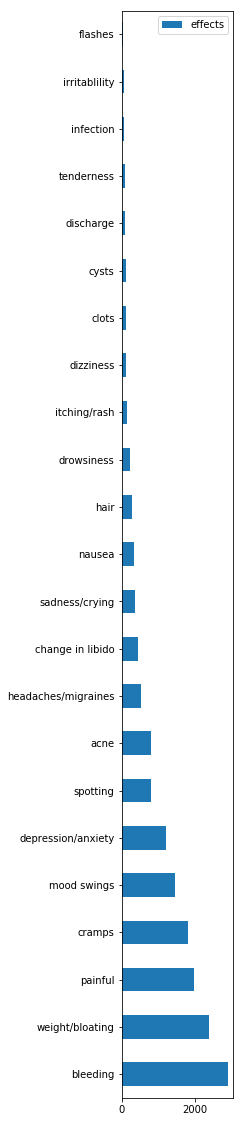

In [72]:
# see full effect list
effects_count = pd.DataFrame(effects_df['effects'].value_counts())
effects_count.plot(kind='barh', figsize=(2,20)) 

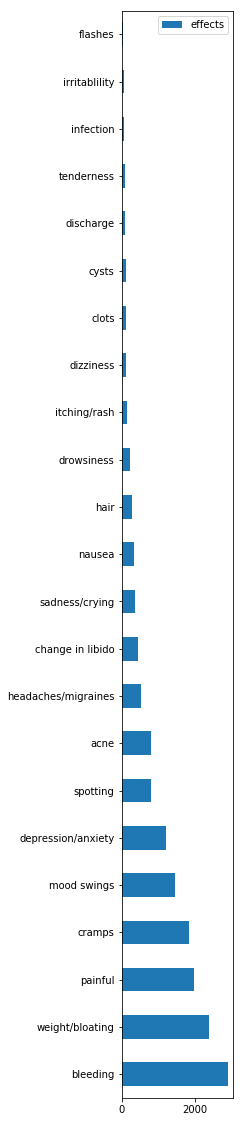

In [16]:
#see consolidated effect list
clean_words(effects_df)
effects_clean = pd.DataFrame(effects_df['effects'].value_counts())
effects_clean.plot(kind='barh', figsize=(2,20)) 

In [17]:
# from itertools import islice
# LIMIT = 10

In [18]:
#side_effect_words = []
#sentiment = []

# Add type based on the birth control product
#for index, row in islice(bc_data.iterrows(), LIMIT):
 #   review_words= row['Review'].split(' ')
  #  for r in review_words:
       # print(r)
   #    if r in side_effects:
    #        side_effect_words.append(r)
     #       sent = row['Pos_Neg']
      #      sentiment.append(sent)

#effects_df= pd.DataFrame({'effects':side_effect_words,
        #                 'seniment':sentiment})
#clean_words(effects_df)
#effects_df

# This code builds tables for visualizations

In [19]:
# Make a dataframe of effects mentioned (consolidated terms) along with the assiciated vader score and method
side_effect_words = []
sentiment = []
methods =[]

# Add type based on the birth control product
for index, row in bc_data.iterrows():
    review_words= row['Review'].split(' ')
    for r in review_words:
       # print(r)
       if r in side_effects:
            side_effect_words.append(r)
            sent = row['Vader_Scale']
            sentiment.append(sent)
            method = row['Method']
            methods.append(method)

effects_df= pd.DataFrame({'effects':side_effect_words,
                         'sentiment':sentiment,
                         'method':methods})
clean_words(effects_df)

In [20]:
effects_df.head()

,effects,sentiment,method
0,bleeding,Very Negative,Shot
1,bleeding,Very Negative,Shot
2,clots,Very Negative,Shot
3,painful,Very Negative,Shot
4,bleeding,Very Negative,Shot


In [21]:
#See a list of all side effects that were mentioned in reviews
unique_effects = effects_df['effects'].unique()
unique_effects

array(['bleeding', 'clots', 'painful', 'headaches/migraines',
       'itching/rash', 'nausea', 'hair', 'mood swings', 'spotting',
       'depression/anxiety', 'sadness/crying', 'weight/bloating',
       'change in libido', 'acne', 'cramps', 'dizziness', 'discharge',
       'drowsiness', 'flashes', 'cysts', 'irritablility', 'infection',
       'tenderness'], dtype=object)

In [22]:
# Seperate side effects into category buckets
emotional = ['mood swings', 'depression/anxiety', 'change in libido', 'irritablility', 'sadness/crying']
physical_painful = [ 'painful','headaches/migraines', 'cramps', 'tenderness', 'nausea', 'itching/rash']
physical_body = ['bleeding', 'hair', 'spotting', 'weight/bloating','acne', 'discharge']
physical_health = ['drowsiness', 'clots', 'infection', 'flashes', 'cysts', 'dizziness']       

In [23]:
#Loop through table and assign category
category = []

# Add type based on the birth control product
for index, row in effects_df.iterrows():
    word = row['effects']
    if word in emotional:
        effects_df.loc[index,"category"] = 'Emotional'
    elif word in physical_painful:
        effects_df.loc[index,"category"] = 'Painful'
    elif word in physical_body:
        effects_df.loc[index,"category"] = 'Body Changes'
    elif word in physical_health:
        effects_df.loc[index,"category"] = 'Health Issues'


# This code builds tables for the Pie Chart

In [24]:
effects_df.head()

,effects,sentiment,method,category
0,bleeding,Very Negative,Shot,Body Changes
1,bleeding,Very Negative,Shot,Body Changes
2,clots,Very Negative,Shot,Health Issues
3,painful,Very Negative,Shot,Painful
4,bleeding,Very Negative,Shot,Body Changes


In [25]:
effects_df.to_sql(name='review_effects', if_exists='replace', con=conn, index=False)

In [26]:
# Check remote database to make sure it migrated correctly
remote_review_effects = pd.read_sql("SELECT * FROM review_effects", conn)
print(len(remote_review_effects))
remote_review_effects.head()

16279


,effects,sentiment,method,category
0,bleeding,Very Negative,Shot,Body Changes
1,bleeding,Very Negative,Shot,Body Changes
2,clots,Very Negative,Shot,Health Issues
3,painful,Very Negative,Shot,Painful
4,bleeding,Very Negative,Shot,Body Changes


In [27]:
vader_count_all = pd.DataFrame(effects_df['sentiment'].value_counts())
vader_count_all.index.name = 'Category'
vader_count_all

,sentiment
Category,
Very Negative,8451
Very Positive,4001
Negative,1582
Positive,1327
Neutral,918


In [28]:
def vader_by_method(method):
    if method != 'All':
        vader_count = effects_df.loc[effects_df['method'] == method]
        vader_count = pd.DataFrame(vader_count['sentiment'].value_counts())
        vader_count.index.name = 'Category'
        vader_count['Category'] = vader_count.index
    else:
        vader_count = pd.DataFrame(effects_df['sentiment'].value_counts())
        vader_count.index.name = 'Category'
        vader_count['Category'] = vader_count.index
    
    return vader_count

In [29]:
ring = vader_by_method('Ring')
ring

,sentiment,Category
Category,,
Very Negative,487,Very Negative
Very Positive,293,Very Positive
Negative,128,Negative
Positive,120,Positive
Neutral,57,Neutral


# This code builds tables for the WordCloud

In [30]:
# summarize effects count for all birth control
# Word Cloud will reference this table
wordcount_all = pd.DataFrame(effects_df['effects'].value_counts())
wordcount_all.index.name = 'words'
wordcount_all['words'] = wordcount_all.index

#Loop through table and assign category
category = []

# Add type based on the birth control product
for index, row in wordcount_all.iterrows():
    word = row['words']
    if word in emotional:
        wordcount_all.loc[index,"category"] = 'Emotional'
    elif word in physical_painful:
        wordcount_all.loc[index,"category"] = 'Painful'
    elif word in physical_body:
        wordcount_all.loc[index,"category"] = 'Body Changes'
    elif word in physical_health:
        wordcount_all.loc[index,"category"] = 'Health Issues'
wordcount_all

,effects,words,category
words,,,
bleeding,2896,bleeding,Body Changes
weight/bloating,2389,weight/bloating,Body Changes
painful,1981,painful,Painful
cramps,1817,cramps,Painful
mood swings,1441,mood swings,Emotional
depression/anxiety,1195,depression/anxiety,Emotional
spotting,800,spotting,Body Changes
acne,795,acne,Body Changes
headaches/migraines,529,headaches/migraines,Painful


In [31]:
#Funtion to build new wordcount dfs filtering by method
def method_counts(filter):
    method_counts = effects_df.loc[effects_df['method'] == filter]
    method_counts = pd.DataFrame(method_counts['effects'].value_counts())
    method_counts['words'] = method_counts.index
    method_counts.index.name = 'words'
    method_counts = method_counts.sort_index()
    
    #Loop through table and assign category
    category = []

    # Add type based on the birth control product
    for index, row in method_counts.iterrows():
        word = row['words']
        if word in emotional:
            method_counts.loc[index,"category"] = 'Emotional'
        elif word in physical_painful:
            method_counts.loc[index,"category"] = 'Painful'
        elif word in physical_body:
            method_counts.loc[index,"category"] = 'Body Changes'
        elif word in physical_health:
            method_counts.loc[index,"category"] = 'Health Issues'
    return method_counts

In [32]:
#Create wordcount df for each method
#wordclouds refer to these tables

wordcount_shot = method_counts('Shot')
wordcount_hormonal_iud = method_counts('Hormonal IUD')
wordcount_non_hormonal_iud = method_counts('Non-hormonal IUD')
wordcount_progestin_pill = method_counts('Progestin Pill')
wordcount_combination_pill = method_counts('Combination Pill')
wordcount_implant = method_counts('Implant')
wordcount_patch = method_counts('Patch')
wordcount_ring = method_counts('Ring')
wordcount_ring

,effects,words,category
words,,,
acne,63,acne,Body Changes
bleeding,106,bleeding,Body Changes
change in libido,67,change in libido,Emotional
clots,19,clots,Health Issues
cramps,52,cramps,Painful
cysts,5,cysts,Health Issues
depression/anxiety,115,depression/anxiety,Emotional
discharge,28,discharge,Body Changes
dizziness,5,dizziness,Health Issues


In [36]:
# Save dataframes to AWS
wordcount_shot.to_sql(name='wc_shot', if_exists='replace', con=conn, index=False)

In [37]:
wordcount_hormonal_iud.to_sql(name='wc_', if_exists='replace', con=conn, index=False)

In [40]:
wordcount_non_hormonal_iud.to_sql(name='wc_non_hormonal_iud', if_exists='replace', con=conn, index=False)

In [45]:
wordcount_progestin_pill.to_sql(name='wc_progestin_pill', if_exists='replace', con=conn, index=False)

In [46]:
wordcount_combination_pill.to_sql(name='wc_combination_pill', if_exists='replace', con=conn, index=False)

In [47]:
wordcount_implant.to_sql(name='wc_implant', if_exists='replace', con=conn, index=False)

In [48]:
wordcount_patch.to_sql(name='wc_patch', if_exists='replace', con=conn, index=False)

In [41]:
wordcount_ring.to_sql(name='wc_ring', if_exists='replace', con=conn, index=False)

In [ ]:
# Count side effects sorted by method
# wordcount_by_method = effects_df.groupby(['method','effects']).size().to_frame('size')
# wordcount_by_method

In [43]:
wordcount_all.to_sql(name='wc_all', if_exists='replace', con=conn, index=False)

In [50]:
# Check remote database to make sure it migrated correctly
remote_wordcount_all = pd.read_sql("SELECT * FROM wc_all", conn)
print(len(remote_wordcount_all))
remote_wordcount_all

23


,effects,words,category
0,2896,bleeding,Body Changes
1,2389,weight/bloating,Body Changes
2,1981,painful,Painful
3,1817,cramps,Painful
4,1441,mood swings,Emotional
5,1195,depression/anxiety,Emotional
6,800,spotting,Body Changes
7,795,acne,Body Changes
8,529,headaches/migraines,Painful
9,445,change in libido,Emotional


# This code builds tables for the Horizontal Bar chart

In [51]:
# Count effects by sentiment for all birth control
effects_group = effects_df.groupby(['effects','sentiment']).size().to_frame('size')
effects_group.head(20)

size
effects          sentiment          
acne             Negative         95
                 Neutral          31
                 Positive         79
                 Very Negative   369
                 Very Positive   221
bleeding         Negative        286
                 Neutral         187
                 Positive        277
                 Very Negative  1457
                 Very Positive   689
change in libido Negative         50
                 Neutral          28
                 Positive         31
                 Very Negative   213
                 Very Positive   123
clots            Negative          6
                 Neutral           4
                 Positive         11
                 Very Negative    66
                 Very Positive    19

In [52]:
# Get a count for each side effect in full list sliced by vader score

vneg=[]
neg=[]
neut=[]
pos=[]
vpos=[]

effects_dict={'Effect':unique_effects,
              'Very Negative':vneg, 
              'Negative':neg,
              'Neutral':neut,
              'Positive':pos,
              'Very Positive':vpos}

for e in unique_effects:
    vneg.append(effects_group.loc[e].loc['Very Negative']['size'])
    neg.append(effects_group.loc[e].loc['Negative']['size'])
    try:
        neut.append(effects_group.loc[e].loc['Neutral']['size'])
    except:
        neut.append(0)
    try:
        pos.append(effects_group.loc[e].loc['Positive']['size'])
    except:
        pos.append(0)
    vpos.append(effects_group.loc[e].loc['Very Positive']['size'])

In [53]:
# Build dataframe showing counts by sentiment for each effect
# The horizontal bar and pie chart refer to this dataset
sentiment_all = pd.DataFrame(effects_dict)
sentiment_all = sentiment_all.set_index('Effect')
sentiment_all['Effect'] = sentiment_all.index
sentiment_all

,Very Negative,Negative,Neutral,Positive,Very Positive,Effect
Effect,,,,,,
bleeding,1457,286,187,277,689,bleeding
clots,66,6,4,11,19,clots
painful,1266,164,77,130,344,painful
headaches/migraines,294,59,31,41,104,headaches/migraines
itching/rash,80,12,5,9,34,itching/rash
nausea,168,49,22,25,62,nausea
hair,166,27,20,27,46,hair
mood swings,778,161,72,101,329,mood swings
spotting,302,84,49,77,288,spotting


In [54]:
# Build function to filter table by method and get a count for each side effect sliced by vader score

def methods_sentiment(filter):
    effects_group_by_method = effects_df.groupby(['method','effects','sentiment']).size().to_frame('size')
    effects_group_by_method= effects_group_by_method.xs(filter, level='method', drop_level=True)

    vneg=[]
    neg=[]
    neut=[]
    pos=[]
    vpos=[]

    effects_group_dict={'Effect':unique_effects,
                  'Very Negative':vneg, 
                  'Negative':neg,
                  'Neutral':neut,
                  'Positive':pos,
                  'Very Positive':vpos}

    for e in unique_effects:
        try:
            vneg.append(effects_group_by_method.loc[e].loc['Very Negative']['size'])
        except:
            vneg.append(0)
        try:
            neg.append(effects_group_by_method.loc[e].loc['Negative']['size'])
        except:
            neg.append(0)
        try:
            neut.append(effects_group_by_method.loc[e].loc['Neutral']['size'])
        except:
            neut.append(0)
        try:
            pos.append(effects_group_by_method.loc[e].loc['Positive']['size'])
        except:
            pos.append(0)
        try:    
            vpos.append(effects_group_by_method.loc[e].loc['Very Positive']['size'])
        except:
            vpos.append(0)

    effects_group_by_method = pd.DataFrame(effects_group_dict)
    effects_group_by_method = effects_group_by_method.set_index('Effect')
    effects_group_by_method['Effect'] = effects_group_by_method.index
    return effects_group_by_method

In [55]:
# Build sentiment table for each method
# The horizontal bar and pie chart refer to this dataset

sentiment_shot = methods_sentiment('Shot')
sentiment_hormonal_iud = methods_sentiment('Hormonal IUD')
sentiment_non_hormonal_iud = methods_sentiment('Non-hormonal IUD')
sentiment_progestin_pill = methods_sentiment('Progestin Pill')
sentiment_combination_pill = methods_sentiment('Combination Pill')
sentiment_implant = methods_sentiment('Implant')
sentiment_patch = methods_sentiment('Patch')
sentiment_ring = methods_sentiment('Ring')

In [ ]:
# sentiment_df.to_csv('sentiment_scale.csv')

In [ ]:
# Save dataframes to AWS
sentiment_shot.to_sql(name='sentiment_shot', if_exists='replace', con=conn, index=False)
sentiment_hormonal_iud.to_sql(name='sentiment_hormonal_iud', if_exists='replace', con=conn, index=False)
sentiment_non_hormonal_iud.to_sql(name='sentiment_non_hormonal_iud', if_exists='replace', con=conn, index=False)
sentiment_progestin_pill.to_sql(name='sentiment_progestin_pill', if_exists='replace', con=conn, index=False)
sentiment_combination_pill.to_sql(name='sentiment_combination_pill', if_exists='replace', con=conn, index=False)
sentiment_implant.to_sql(name='sentiment_implant', if_exists='replace', con=conn, index=False)
sentiment_patch.to_sql(name='sentiment_patch', if_exists='replace', con=conn, index=False)
sentiment_ring.to_sql(name='sentiment_ring', if_exists='replace', con=conn, index=False)

In [ ]:
sentiment_all.to_sql(name='sentiment_all', if_exists='replace', con=conn, index=False)

In [56]:
# Check remote database to make sure it migrated correctly
remote_sentiment_ring = pd.read_sql("SELECT * FROM sentiment_ring", conn)
print(len(remote_sentiment_ring))
remote_sentiment_ring

23


,Very Negative,Negative,Neutral,Positive,Very Positive,Effect
0,52,11,4,22,17,bleeding
1,15,2,0,0,2,clots
2,38,4,2,2,9,painful
3,18,6,1,6,16,headaches/migraines
4,10,2,0,0,5,itching/rash
5,12,5,0,3,10,nausea
6,5,2,2,2,3,hair
7,60,14,11,15,43,mood swings
8,3,5,0,1,7,spotting
9,74,11,7,12,11,depression/anxiety
